# CW1 - Python Test

This is a notebook that includes all the tools we will eventually learn to use in this class. To ensure that you are able to use these tools, we just need you to run this notebook and show us the output. You are welcome to mess around with the code and see what happens, but you don't need to. We will learn how to do this modeling in the next few weeks.

We recommend that you download and install the latest version of [Anaconda](https://www.anaconda.com/products/individual) for this class. This will install all of the packages we will need for this class. If you are having trouble installing Anaconda, let us know.

**I am done or I already have Anaconda installed**

Cool. Then make an environment for this class using the following command:

```conda create -n phy321```

Then activate the environment using:

```conda activate phy321```

Then install the following packages:

```conda install numpy scipy matplotlib pandas jupyterlab```

Then fire up jupyterlab using:

```jupyter lab```

Now, try to run the following code blocks. If you get an error, you probably need to install a package. If you get an error that you can't figure out, let us know.

## Import the required libraries

Here we simply importing the libraries we will need for this class. If you get an error, you probably need to install a package.

```conda install X```

where X is the package you need to install.

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Define the initial conditions of the problem

We are modeling the motion of a object thrown at an angle, so we need to define a few parameters, which we do below.

We then store the initial conditions in a vector called `initial_state`.

In [6]:
# Define the initial conditions and parameters
g = 9.81  # Acceleration due to gravity (m/s^2)
angle = 45  # Launch angle in degrees
speed = 20  # Initial speed in m/s
t_max = 5  # Maximum simulation time in seconds

# Convert angle to radians
angle_rad = np.radians(angle)

# Initial position and velocity components
x0 = 0
y0 = 0
vx0 = speed * np.cos(angle_rad)
vy0 = speed * np.sin(angle_rad)

# Initial state vector
initial_state = [x0, y0, vx0, vy0]

## Define and integrate the equations of motion

This is where the physics happens. We are using a numerical integrator called `solve_ivp` to integrate the equations of motion - the differential equations that describe the motion of the object. We will learn more about this in the next few weeks, but we suspect you can see how this is a constant force model. By the way, the `solve_ivp` function is named this way because it is solving an [initial value problem](https://en.wikipedia.org/wiki/Initial_value_problem) - this is a common way to solve differential equations. And since differential equations are the best model we have for classical physics, we will be using this function a lot.

In [7]:
# Define the equations of motion
def equations_of_motion(t, state):
    x, y, vx, vy = state
    dxdt = vx
    dydt = vy
    dvxdt = 0
    dvydt = -g
    return [dxdt, dydt, dvxdt, dvydt]

# Solve the equations of motion using SciPy's solve_ivp function
solution = solve_ivp(equations_of_motion, [0, t_max], initial_state, max_step=0.01)

## Convert the output to a pandas dataframe

This is not necessary, but it is a nice way to store the data. The `pandas` framework is a commonly used one and learning how it works is terribly useful for the future. We will learn more about pandas in the next few weeks, but for now just know that it is a way to store data in a table-like format.

In [8]:
# Convert the solution to a Pandas DataFrame for easier handling
trajectory_df = pd.DataFrame(solution.y.T, columns=['x', 'y', 'vx', 'vy'])
trajectory_df['time'] = solution.t
trajectory_df.head()

,x,y,vx,vy,time
0,0.000000,0.000000,14.142136,14.142136,0.000000
1,0.001000,0.001000,14.142136,14.141442,0.000071
2,0.010999,0.010996,14.142136,14.134506,0.000778
3,0.110992,0.110690,14.142136,14.065144,0.007848
4,0.252414,0.250851,14.142136,13.967044,0.017848


## Plot the results

Finally, we plot the results. We will learn more about plotting in the next few weeks, but for now just know that this is a way to visualize the results of the simulation.

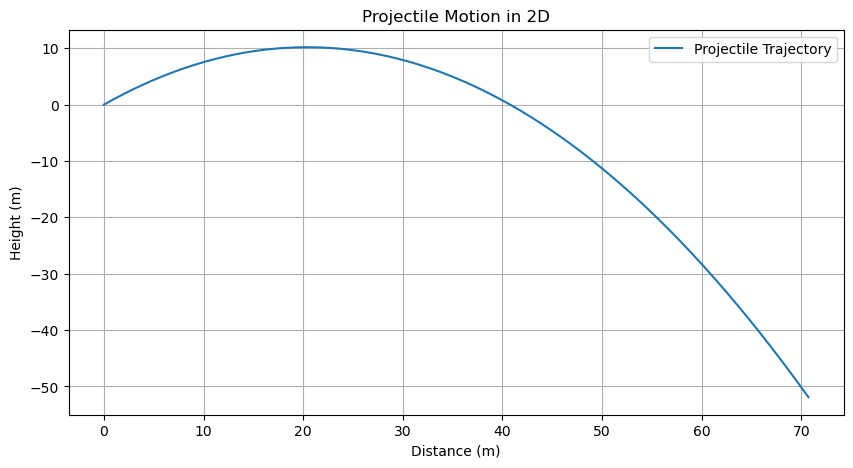

In [5]:
# Plot the trajectory of the projectile using Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(trajectory_df['x'], trajectory_df['y'], label='Projectile Trajectory')
plt.title('Projectile Motion in 2D')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()

## Questions to consider

* How are we writing the differential equations as code?
* How can you make the program stop when the object hits the ground?
* Can you set this up to model something you have intuition for? How does it compare to your intuition?